<a href="https://colab.research.google.com/github/ayanmmm/Assignment16/blob/main/Random_Forest_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np

**Importing the dataset**

In [10]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [11]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [12]:
from sklearn.model_selection import train_test_split

In [15]:
del df['User ID']

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [17]:
x=df[['Gender','Age','EstimatedSalary']]
y=df['Purchased']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Feature Scaling**

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
from pandas.core.array_algos import transforms
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

**Fitting Random Forest to the Training set**

In [56]:
model=RandomForestClassifier(max_depth=88,n_estimators=5,random_state=10)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=88, n_estimators=5, random_state=10)

**Predicting the Test set results**

In [58]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

**Making the Confusion Matrix**

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [60]:
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[75  4]
 [ 5 36]]


In [61]:
#Classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        79
           1       0.90      0.88      0.89        41

    accuracy                           0.93       120
   macro avg       0.92      0.91      0.92       120
weighted avg       0.92      0.93      0.92       120



**Visualising the Training set results**

In [62]:
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.metrics import RocCurveDisplay

In [63]:
training_score = model.score(x_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 97.5


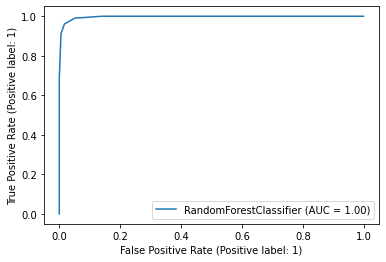

In [64]:
RocCurveDisplay.from_estimator(model,x_train,y_train)

**Visualising the Test set results**

In [65]:
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)

Test data score is : 92.5


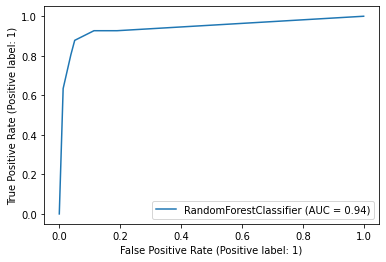

In [66]:
RocCurveDisplay.from_estimator(model,x_test,y_test)